In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import f1_score

In [2]:
results_moralexceptqa = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])

results_ethics_cs = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])
results_ethics_deo = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])
results_ethics_justice = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])
results_ethics_util = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])
results_ethics_virtue = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])

In [3]:
languages = ["chinese", "english", "german", "hindi", "spanish", "urdu"]
model_names = ["3_2", "3_1", "OLMo_2", "Phi", "Mistral", "Qwen2_5", "deepseek"]

In [4]:
# MoralExceptQA
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/MEQ_Results/binary_eval_results_scenario_meta-llama_Llama-3_1-8B-Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_path = "/shared/2/projects/moral-project/MEQ_Results/"
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for fname in os.listdir(base_file_path):
    if "metrics" in fname:
        continue

    if "scenario" in fname:
        lang = "english"
    else:
        for lang in languages:
            if lang.lower() in fname.lower():
                break
    if "OLMo-2" in fname:
        model = "OLMo_2"
    else:
        for model in model_names:
            if model.lower() in fname.lower():
                break
    
    with open(base_file_path+fname, "r") as f:
        data = json.load(f)

    parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
    idxs[model][lang] = [i for i,r in parsed]
    parsed = [r for i,r in parsed]
    try:
        instances = [r['scenario'] for r in parsed]
    except:
        instances = [r['question'] for r in parsed]
    predictions = [r["parsed_answer"] for r in parsed]
    references = [r["reference"] for r in parsed]

    scenarios[model][lang] = instances
    responses[model][lang] = predictions
    ground_truths[model][lang] = references

for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_moralexceptqa.loc[len(results_moralexceptqa)] = row

In [5]:
# Ethics-CS
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/ETHICS_Results_sf/para_cms_English_results_meta_llama_Llama_3_1_8B_Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
english_data = english_data['results']
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama" in fname.lower():
        #     if "fixed" not in fname:
        #         continue
        if "cms" not in fname.lower() and "commonsense" not in fname.lower():
            continue

        if "commonsense" not in fname:
            if "scenario" in fname:
                lang = "english"
            else:
                for lang in languages:
                    if lang.lower() in fname.lower():
                        break
        else:
            for lang in languages:
                if lang.lower() in fname.lower():
                    break

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        idxs[model][lang] = [i for i,r in parsed]
        parsed = [r for i,r in parsed]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [r["reference"] for r in parsed]

        scenarios[model][lang] = instances
        responses[model][lang] = predictions
        ground_truths[model][lang] = references

for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_ethics_cs.loc[len(results_ethics_cs)] = row

In [6]:
# Ethics-Deo
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/ETHICS_Results_sf/para_den_English_results_meta_llama_Llama_3_1_8B_Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
english_data = english_data['results']
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama" in fname.lower():
        #     if "fixed" not in fname:
        #         continue
        if "den" not in fname.lower() and "deontology" not in fname.lower():
            continue

        if "deontology" not in fname:
            if "scenario" in fname:
                lang = "english"
            else:
                for lang in languages:
                    if lang.lower() in fname.lower():
                        break
        else:
            for lang in languages:
                if lang.lower() in fname.lower():
                    break

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        idxs[model][lang] = [i for i,r in parsed]
        parsed = [r for i,r in parsed]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [r["reference"] for r in parsed]

        scenarios[model][lang] = instances
        responses[model][lang] = predictions
        ground_truths[model][lang] = references

for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_ethics_deo.loc[len(results_ethics_deo)] = row

In [7]:
# Ethics-justice
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/ETHICS_Results_sf/para_justice_English_results_meta_llama_Llama_3_1_8B_Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
english_data = english_data['results']
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama" in fname.lower():
        #     if "fixed" not in fname:
        #         continue
        if "justice" not in fname.lower():
            continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        idxs[model][lang] = [i for i,r in parsed]
        parsed = [r for i,r in parsed]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [r["reference"] for r in parsed]

        scenarios[model][lang] = instances
        responses[model][lang] = predictions
        ground_truths[model][lang] = references

for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_ethics_justice.loc[len(results_ethics_justice)] = row

In [8]:
# Ethics-util
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/ETHICS_Results_sf/para_util_English_results_meta_llama_Llama_3_1_8B_Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
english_data = english_data['results']
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "util" not in fname.lower() and "utilitarian" not in fname.lower():
            continue

        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama_3_1" in fname.lower() or "llama_3_2" in fname.lower():
        #     if "fixed" not in fname.lower():
        #         continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        idxs[model][lang] = [i for i,r in parsed]
        parsed = [r for i,r in parsed]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [1] * len(parsed)

        scenarios[model][lang] = instances
        responses[model][lang] = predictions
        ground_truths[model][lang] = references
       
for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_ethics_util.loc[len(results_ethics_util)] = row

In [9]:
# Ethics-virtue
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/ETHICS_Results_sf/para_virtue_English_results_meta_llama_Llama_3_1_8B_Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
english_data = english_data['results']
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "virtue" not in fname.lower():
            continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        idxs[model][lang] = [i for i,r in parsed]
        parsed = [r for i,r in parsed]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [1] * len(parsed)

        scenarios[model][lang] = instances
        responses[model][lang] = predictions
        ground_truths[model][lang] = references

for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_ethics_virtue.loc[len(results_ethics_virtue)] = row

In [10]:
all_df = [results_moralexceptqa, results_ethics_cs, results_ethics_deo, results_ethics_justice, results_ethics_util, results_ethics_virtue]

### Get the unimoral vectors

In [11]:
from collections import defaultdict
from transformers import AutoTokenizer, ModernBertForSequenceClassification
import torch
import torch.nn as nn

def preprocess(text):
    tokens = text.lower().split()
    return tokens

class BertForCulturalRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = ModernBertForSequenceClassification.from_pretrained("answerdotai/ModernBERT-base", num_labels=6)
    
    def forward(self, input_ids, attention_mask=None, token_type_ids=None, labels=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = None
        if labels is not None:
            loss_fn = torch.nn.MSELoss()
            loss = loss_fn(logits, labels)
        
        return {"loss": loss, "logits": logits}
    
output_dir = "/shared/2/projects/moral-project/topic_modelling/MoralClassifier"
checkpoint_path = os.path.join(output_dir, "best_model.pt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained("answerdotai/ModernBERT-base")
model = BertForCulturalRegression().to(device)

checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])
print("Model loaded from ", checkpoint_path)
model.eval()

2025-08-18 20:32:42.955097: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-18 20:32:43.100718: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Flash Attention 2 only supports torch.float16 and torch.bfloat16 dtypes, but the current dype in ModernBertForSequenceClassification is torch.float32. You should run training or inference using Automatic Mixed-Precision via the `with torch.autocast(device_type='torch_device'):` decorator, or load the model with the `torch_dtype` argument. Example: `model = AutoModel.from_

Model loaded from  /shared/2/projects/moral-project/topic_modelling/MoralClassifier/best_model.pt


BertForCulturalRegression(
  (bert): ModernBertForSequenceClassification(
    (model): ModernBertModel(
      (embeddings): ModernBertEmbeddings(
        (tok_embeddings): Embedding(50368, 768, padding_idx=50283)
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (layers): ModuleList(
        (0): ModernBertEncoderLayer(
          (attn_norm): Identity()
          (attn): ModernBertAttention(
            (Wqkv): Linear(in_features=768, out_features=2304, bias=False)
            (rotary_emb): ModernBertUnpaddedRotaryEmbedding(dim=64, base=160000.0, scale_base=None)
            (Wo): Linear(in_features=768, out_features=768, bias=False)
            (out_drop): Identity()
          )
          (mlp_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): ModernBertMLP(
            (Wi): Linear(in_features=768, out_features=2304, bias=False)
            (act): GELUActivation()
            (d

In [12]:
def get_moral_scores_rich(scenario):
    with torch.no_grad():
        batch = tokenizer(scenario, truncation=True, padding="max_length", max_length=256, return_tensors='pt')
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs["logits"]
        logits = logits.squeeze().cpu().numpy().tolist()

    return logits

In [13]:
from tqdm import tqdm

lang_to_scenario_col = {
    'english': 'english_scenario',
    'chinese': 'chinese_scenario',
    'german': 'german_scenario',
    'hindi': 'hindi_scenario',
    'spanish': 'spanish_scenario',
    'urdu': 'urdu_scenario'
}

for df in all_df:
    emfd_scores_col = "unimoral_vec"
    reference_scenarios =  df['reference_scenario'][0]
    scenario_scores = []
    for scenario in tqdm(reference_scenarios):
        scores = get_moral_scores_rich(scenario)
        scenario_scores.append(scores)
    df[emfd_scores_col] = [scenario_scores]*len(df['reference_scenario'])


  0%|          | 0/148 [00:00<?, ?it/s]

/opt/anaconda/lib/python3.12/site-packages/torch/_inductor/compile_fx.py:236: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.warn(
100%|██████████| 4975/4975 [05:45<00:00, 14.38it/s]


In [14]:
all_df_names = ['results_moralexceptqa', 'results_ethics_cs', 'results_ethics_deo', 'results_ethics_justice', 'results_ethics_util', 'results_ethics_virtue']
for i,df in enumerate(all_df):
    df.to_csv(f"/shared/2/projects/moral-project/PaperPlots/Intermediate_Results/UniMoral_Coeff/{all_df_names[i]}.csv")

### Continue

In [11]:
results_moralexceptqa = pd.read_csv("/shared/2/projects/moral-project/PaperPlots/Intermediate_Results/UniMoral_Coeff/results_moralexceptqa.csv")
results_ethics_cs = pd.read_csv("/shared/2/projects/moral-project/PaperPlots/Intermediate_Results/UniMoral_Coeff/results_ethics_cs.csv")
results_ethics_deo = pd.read_csv("/shared/2/projects/moral-project/PaperPlots/Intermediate_Results/UniMoral_Coeff/results_ethics_deo.csv")
results_ethics_justice = pd.read_csv("/shared/2/projects/moral-project/PaperPlots/Intermediate_Results/UniMoral_Coeff/results_ethics_justice.csv")
results_ethics_util = pd.read_csv("/shared/2/projects/moral-project/PaperPlots/Intermediate_Results/UniMoral_Coeff/results_ethics_util.csv")
results_ethics_virtue = pd.read_csv("/shared/2/projects/moral-project/PaperPlots/Intermediate_Results/UniMoral_Coeff/results_ethics_virtue.csv")

all_df = [results_moralexceptqa, results_ethics_cs, results_ethics_deo, results_ethics_justice, results_ethics_util, results_ethics_virtue]

In [12]:
all_df[0].head()

,Unnamed: 0,model,reference_scenario,reference_ground_truth,english_scenario,english_scenario_idx,chinese_scenario,chinese_scenario_idx,german_scenario,german_scenario_idx,...,hindi_ground_truth,spanish_ground_truth,urdu_ground_truth,chinese_response,english_response,german_response,hindi_response,spanish_response,urdu_response,unimoral_vec
0,0,3_2,"[""Imagine that a stranger tells Hank to spill ...","[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[""Imagine that a stranger tells Hank to paint ...","[7, 12, 15, 19, 22, 23, 25, 28, 29, 30, 39, 40...","['假设一个陌生人告诉汉克在邻居的前院里把几加仑的漂白剂倒在邻居的前院里,而没有邻居的许可如...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[""Stellen Sie sich vor, ein Fremder sagt Hank,...","[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 1...",...,"[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[-0.0984133705496788, 0.03428828716278076, 0...."
1,1,3_1,"[""Imagine that a stranger tells Hank to spill ...","[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[""Imagine that a stranger tells Hank to spill ...","[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['假设一个陌生人告诉汉克在邻居的前院里把几加仑的漂白剂倒在邻居的前院里,而没有邻居的许可如...","[0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...","[""Stellen Sie sich vor, ein Fremder sagt Hank,...","[0, 1, 2, 3, 4, 5, 7, 8, 9, 12, 14, 16, 17, 19...",...,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, ...","[[-0.0984133705496788, 0.03428828716278076, 0...."
2,2,OLMo_2,"[""Imagine that a stranger tells Hank to spill ...","[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[""Imagine that a stranger tells Hank to spill ...","[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","['假设一个陌生人给了汉克一千美元,让他在没有邻居许可的情况下把邻居的门外涂成蓝色汉克执行了...","[1, 3, 4, 5, 6, 9, 12, 14, 15, 16, 17, 18, 20,...","['Stellen Sie sich vor, ein Fremder gibt Hank ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",...,"[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[-0.0984133705496788, 0.03428828716278076, 0...."
3,3,Phi,"[""Imagine that a stranger tells Hank to spill ...","[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[""Imagine that a stranger tells Hank to spill ...","[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['假设一个陌生人告诉汉克在邻居的前院里把几加仑的漂白剂倒在邻居的前院里,而没有邻居的许可如...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['Stellen Sie sich vor, ein Fremder gibt Hank ...","[3, 4, 10, 47]",...,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, ...","[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import ast

languages = ['english', 'chinese', 'german', 'hindi', 'spanish', 'urdu']
emfd_dims = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

agg_emfd = {lang: {'moral': [], 'immoral': []} for lang in languages}

for df in tqdm(all_df):
    df = df.copy()
    df["unimoral_vec"] = df["unimoral_vec"].apply(ast.literal_eval)
    for lang in languages:
        response_col = f"{lang}_response"
        idx_col = f"{lang}_scenario_idx"

        df[idx_col] = df[idx_col].apply(ast.literal_eval)

        for row in df.itertuples(index=False):
            responses = row._asdict()[response_col]
            indices = row._asdict()[idx_col]
            emfd_scores = [row.unimoral_vec[i] for i in indices]

            valid_responses = [x for x in responses if x in [0, 1, '0', '1']]

            for resp, emfd_vec in zip(valid_responses, emfd_scores):
                if resp in (1, '1'):
                    agg_emfd[lang]['moral'].append(emfd_vec)
                else:
                    agg_emfd[lang]['immoral'].append(emfd_vec)

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:10<00:00,  1.68s/it]


In [ ]:
for lang in agg_emfd:
    for label in ['moral', 'immoral']:
        cleaned = []
        for vec in agg_emfd[lang][label]:
            arr = np.array(vec)
            if not np.any(np.isnan(arr)):
                cleaned.append(vec)
        agg_emfd[lang][label] = cleaned

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import rcParams

emfd_dims = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

records = []
for lang, label_data in agg_emfd.items():
    rows = []
    for label, y in [('moral', 1), ('immoral', 0)]:
        for vec in label_data[label]:
            rows.append({
                'language': lang,
                'label': y,
                **{dim: v for dim, v in zip(emfd_dims, vec)}
            })
    df_lang = pd.DataFrame(rows)
    X = sm.add_constant(df_lang[emfd_dims])
    y = df_lang['label']
    model = sm.Logit(y, X).fit(disp=False)
    
    for dim in emfd_dims:
        coef = model.params[dim]
        ci_low, ci_high = model.conf_int().loc[dim]
        significant = not (ci_low <= 0 <= ci_high)
        records.append({
            'language': lang,
            'foundation': dim,
            'coef': coef,
            'significant': significant
        })

df = pd.DataFrame(records)

In [ ]:
coef_matrix = df.pivot(index='language', columns='foundation', values='coef')
sig_mask = df.pivot(index='language', columns='foundation', values='significant')

coef_matrix_z = coef_matrix.sub(coef_matrix.mean(axis=1), axis=0)
coef_matrix_z = coef_matrix_z.div(coef_matrix.std(axis=1), axis=0)

capitalized_xticklabels = [label.capitalize() for label in coef_matrix_z.columns]
capitalized_yticklabels = [label.capitalize() for label in coef_matrix_z.index]

/tmp/ipykernel_3373681/740682997.py:61: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


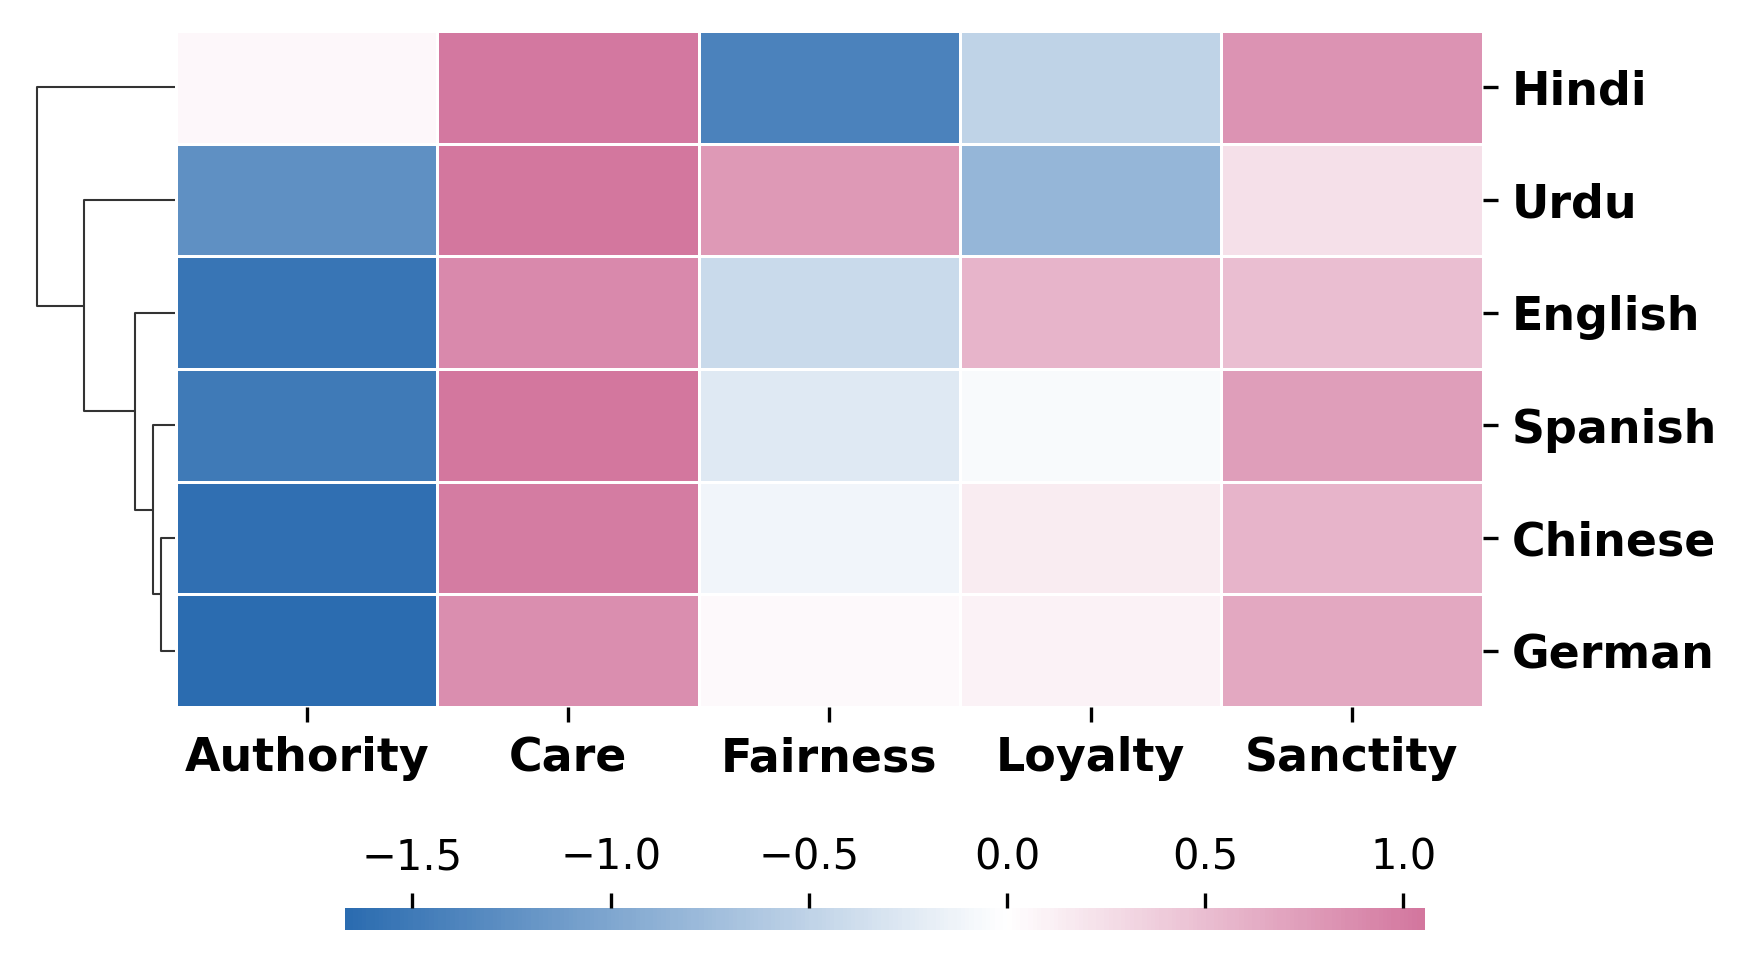

In [ ]:
rcParams.update({
    "font.size": 10,
    "axes.titlesize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 300,
    "axes.labelweight": "bold",
    "axes.labelsize": 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans", "Arial", "Liberation Sans"],
})

from matplotlib.colors import LinearSegmentedColormap
colors = ["#2b6cb0", "white", "#B92766"]

custom_cmap = LinearSegmentedColormap.from_list("rq3_blue_diverging", colors, N=256)

g = sns.clustermap(
    coef_matrix_z,
    cmap=custom_cmap,
    center=0,
    figsize=(6, 3),
    fmt='',
    annot_kws={"fontsize": 16, "fontweight": "bold", "color": "#222"},
    linewidths=0.7,
    linecolor='white',
    cbar_kws={'label': '', 'orientation': 'horizontal', 'shrink': 0.7, 'pad': 0.08},
    row_cluster=True,
    col_cluster=False,
    dendrogram_ratio=(.10, 0),
    xticklabels=capitalized_xticklabels,
    yticklabels=capitalized_yticklabels,
)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0, fontsize=11, fontweight='bold')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=11, fontweight='bold')
g.ax_heatmap.set_xlabel("")
g.ax_heatmap.set_ylabel("")

for spine in g.ax_heatmap.spines.values():
    spine.set_visible(False)

g.cax.set_position([.2, -0.05, .6, .025])

g.cax.xaxis.set_label_position('top')
g.cax.xaxis.set_ticks_position('top')

plt.tight_layout()
plt.savefig("FinalPlots/row_clustered_unimoral_heatmap.pdf", bbox_inches='tight', dpi=300)
plt.show()
